## Model Objectives:
- Dataset: Tourism Nova Scotia - Visitation for 2024
- RandomForestClassifier: Using 'Mode of Entry' as the features for classification, as RandomForestClassifier will use the rest 
                of these columns works by creating multiple decision trees during training and then aggregating their predictions 
                to make the final classification.  
- The classification_report provides a summary of key metrics like precision, recall, f1-score.  
- The accuracy_score measures the overall correctness of the model by calculating the proportion of correct predictions 
                out of all predictions.  
- The precision_score calculates the precision of the model, focusing on how many of the predicted positive cases are 
                actually positive.
- The recall_score measures the recall of the model, indicating how many actual positive cases were correctly identified.
- The f1_score calculates the F1-score of the model, which is a balanced measure between precision and recall.
- The confusion_matrix shows the confusion matrix, which provides insight into the true positives, true negatives, 
            false positives, and false negatives of the classification model. It’s a great way to see how well the 
            model performs across different classes.
- For the demonstration, we will check the predictions against the 'Mode of Entrty' label.  

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer  # added for OneHotEncoder in the pipeline
from sklearn.compose import make_column_selector # added to further automate the OneHotEncoder functionality
from sklearn.base import BaseEstimator, TransformerMixin # added for date column encoding and standardization

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.pipeline import Pipeline

# Load the dataset

In [2]:
# pass in dataset and label for classification
data = './Tourism_Nova_Scotia_Visitation_20250202_UPDATED.csv'

df = pd.read_csv(data)
df.head(3)

,Mode of entry,Month/Year,Visitor Origin,Country,Number of Visitors (Rounded to nearest hundred)
0,Air,January 2006,Atlantic Canada,Canada,5400.0
1,Air,January 2006,Quebec,Canada,3400.0
2,Air,January 2006,Ontario,Canada,16600.0


# Perform EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7182 entries, 0 to 7181
Data columns (total 5 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Mode of entry                                    7182 non-null   object 
 1   Month/Year                                       7182 non-null   object 
 2   Visitor Origin                                   7182 non-null   object 
 3   Country                                          7182 non-null   object 
 4   Number of Visitors (Rounded to nearest hundred)  6282 non-null   float64
dtypes: float64(1), object(4)
memory usage: 280.7+ KB


In [4]:
# Convert any data types as required
columns_to_convert = ['Mode of entry', 'Month/Year', 'Visitor Origin','Country']
for col in columns_to_convert:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7182 entries, 0 to 7181
Data columns (total 5 columns):
 #   Column                                           Non-Null Count  Dtype   
---  ------                                           --------------  -----   
 0   Mode of entry                                    7182 non-null   category
 1   Month/Year                                       7182 non-null   category
 2   Visitor Origin                                   7182 non-null   category
 3   Country                                          7182 non-null   category
 4   Number of Visitors (Rounded to nearest hundred)  6282 non-null   float64 
dtypes: category(4), float64(1)
memory usage: 102.7 KB


In [5]:
#Check for nulls or missing data in the dataset
df.isna().sum()

Mode of entry                                        0
Month/Year                                           0
Visitor Origin                                       0
Country                                              0
Number of Visitors (Rounded to nearest hundred)    900
dtype: int64

In [6]:
#drop the null value rows if present in the dataset
'''
Courtesy:Docstring (Shift + Tab)
axis : {0 or 'index', 1 or 'columns'}, default 0, only a single axis is allowed.
    * 0, or 'index' : Drop rows which contain missing values.
    * 1, or 'columns' : Drop columns which contain missing value.  
how : {'any', 'all'}, default 'any'
    * 'any' : If any NA values are present, drop that row or column.
    * 'all' : If all values are NA, drop that row or column.
'''
df = df.dropna(axis= 0,how= 'any')

In [7]:
#Make sure nulls or missing data is removed successfully
df.isna().sum()

Mode of entry                                      0
Month/Year                                         0
Visitor Origin                                     0
Country                                            0
Number of Visitors (Rounded to nearest hundred)    0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of Visitors (Rounded to nearest hundred),6282.0,5827.984718,16182.84918,0.0,300.0,900.0,3200.0,140100.0


# Prepare the data for modeling


In [9]:
# Variable set-up block

label_column = 'Mode of entry'
test_size = 0.3
random_state = 42
mdl_selected = 'Random Forest Classifier'

In [10]:
X = df.drop(columns=[label_column])
y = df[label_column]

In [11]:
X.head(3)

,Month/Year,Visitor Origin,Country,Number of Visitors (Rounded to nearest hundred)
0,January 2006,Atlantic Canada,Canada,5400.0
1,January 2006,Quebec,Canada,3400.0
2,January 2006,Ontario,Canada,16600.0


# Split the data into train and test sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test_size, random_state= random_state)

# Define column transformer (i.e. One-Hot encoding) - MANUAL

In [13]:
X_train.columns

Index(['Month/Year', 'Visitor Origin', 'Country',
       'Number of Visitors (Rounded to nearest hundred)'],
      dtype='object')

In [14]:
# Custom transformer for date-time features

class DateTimeTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y= None):
        return self

    def transform(self, X): 
        return pd.concat([X.dt.year, X.dt.month, X.dt.day], axis= 1)

# Define column transformer (i.e. One-Hot encoding) - DYNAMIC

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4397 entries, 1788 to 860
Data columns (total 4 columns):
 #   Column                                           Non-Null Count  Dtype   
---  ------                                           --------------  -----   
 0   Month/Year                                       4397 non-null   category
 1   Visitor Origin                                   4397 non-null   category
 2   Country                                          4397 non-null   category
 3   Number of Visitors (Rounded to nearest hundred)  4397 non-null   float64 
dtypes: category(3), float64(1)
memory usage: 97.2 KB


In [16]:
# Define the column transformer
preproc = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), make_column_selector(dtype_include=['int64', 'float64'])),
        ('cat', OneHotEncoder(drop='first', handle_unknown= 'ignore'), make_column_selector(dtype_include=['object', 'category'])),
        ('date', DateTimeTransformer(), make_column_selector(dtype_include=['datetime64']))
    ])
preproc

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000178EC8DB710>),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000178D93403D0>),
                                ('date', DateTimeTransformer(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000178ED94F050>)])

# Create the pipeline using the preprocessor the chosen classification model

In [17]:
# Create a pipeline standard scaler, and logistic regression
# Create a pipeline with the preprocessor and logistic regression
pipeline = Pipeline([
    ('preprocessor', preproc),
    ('rf_classifier', RandomForestClassifier())
])


In [18]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000178EC8DB710>),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000178D93403D0>),
                                                 ('date', DateTimeTransformer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000178ED94F050>)])),
                ('rf_classifier', RandomForestClassifier())])

# Train the model

We may or may not encounter the below warning which means the train or test set have some unknown values that will be treated as 0. It depends on how the test and train split is performed
#### UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros warnings. 

In [19]:
# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

C:\Users\Divya\miniconda3\envs\py311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [20]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000178EC8DB710>),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000178D93403D0>),
                                                 ('date', DateTimeTransformer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000178ED94F050>)])),
                ('rf_classifier', RandomForestClassifier())])

In [21]:
df['Mode of entry'].value_counts()

Mode of entry
Air     3413
Road    2869
Name: count, dtype: int64

## Probability

In [22]:
# probability scores... 
# I do this first as it's kinda my "thing" - many don't use probability scoring in their pipelines
y_proba = pipeline.predict_proba(X_test)

# bring in just the probability of y_pred

res = pd.DataFrame({'y_true':y_test, 
              'y_pred':y_pred, 
              'proba': [max(proba) for proba in y_proba]
              })
res['match'] = np.where(res['y_true'] == res['y_pred'], 1, 0)

# report the "misses"
misses = res[res['match'] == 0]
miss_count = len(misses)

print(f"There are {miss_count} misses vs {len(y_test)} total.")

C:\Users\Divya\miniconda3\envs\py311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


There are 513 misses vs 1885 total.


In [23]:
misses.head()

,y_true,y_pred,proba,match
5411,Air,Road,0.940000,0
2187,Air,Road,0.650667,0
5786,Air,Road,0.563190,0
599,Road,Air,0.700000,0
6876,Road,Air,0.820000,0


## Metrics for Classification

## Accuracy
Accuracy measures the proportion of correctly classified instances.
Higher accuracy indicates that the model is correctly classifying more instances.

In [24]:
# assigning y_test to variable y_true to help with clarity while learning
y_true = y_test

y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy of the {mdl_selected} model: {accuracy:.2f}\nValue before formatting: {accuracy}")

C:\Users\Divya\miniconda3\envs\py311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy of the Random Forest Classifier model: 0.73
Value before formatting: 0.7278514588859416


## Precision
Measures the accuracy of positive predictions, i.e., of all instances predicted as a particular class, how many actually belong to that class.

In [25]:
precision = precision_score(y_true, y_pred, average='weighted')
print(f"Accuracy of the {mdl_selected} model: {precision:.2f}\nValue before formatting: {precision}")

Accuracy of the Random Forest Classifier model: 0.73
Value before formatting: 0.7270535092649035


### Recall (Sensitivity)
The ratio of correctly predicted positive observations to all observations in the actual class.

In [26]:
recall = recall_score(y_true, y_pred, average='weighted')
print(f"Accuracy of the {mdl_selected} model: {recall:.2f}\nValue before formatting: {recall}")

Accuracy of the Random Forest Classifier model: 0.73
Value before formatting: 0.7278514588859416


## F1 Score 
Measures the ability of the model to find all relevant instances, i.e., of all actual instances of a class, how many were correctly identified by the model.

In [27]:
f1 = f1_score(y_true, y_pred, average='weighted') 
print(f"Accuracy of the {mdl_selected} model: {f1:.2f}\nValue before formatting: {f1}")

Accuracy of the Random Forest Classifier model: 0.73
Value before formatting: 0.7271051343927281


### Classification Report
A comprehensive report showing precision, recall, F1 score, and support for each class.

In [28]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

         Air       0.74      0.77      0.76      1039
        Road       0.71      0.67      0.69       846

    accuracy                           0.73      1885
   macro avg       0.73      0.72      0.72      1885
weighted avg       0.73      0.73      0.73      1885



### Confusion matrix
The confusion matrix provides a detailed breakdown of the predictions. This matrix gives you more insight into how well the classifier performs for each class individually and highlights where it might be confusing one class for another.

In [29]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[803, 236],
       [277, 569]])

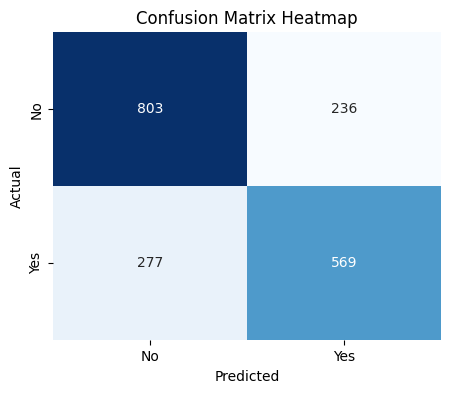

In [30]:
class_labels = ['No', 'Yes']
 
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=False)
 
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.title('Confusion Matrix Heatmap')
plt.show()